In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [4]:
df = pd.read_csv("input/processed_input.csv", index_col = None)
#df = df.drop(columns = 'Unnamed: 0')
df

wave  temp  time  intensity
0       599.8177    25     0    92.4064
1       601.7464    25     0    93.1177
2       603.6751    25     0    93.3507
3       605.6037    25     0    93.2874
4       607.5324    25     0    93.8345
...          ...   ...   ...        ...
61735  3992.3559   420   660    99.9956
61736  3994.2846   420   660    99.8334
61737  3996.2132   420   660    99.8121
61738  3998.1419   420   660    99.8471
61739  4000.0706   420   660    99.8816

[61740 rows x 4 columns]

In [10]:
def test_train_compound(df):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    
    X_train, X_test, y_train, y_test = train_test_split(df[["wave", "temp", "time"]], df["intensity"], test_size=0.2, random_state=7)
    return X_train, X_test, y_train, y_test

In [5]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

Empty DataFrame
Columns: [Model, Compound, Train Accuracy, Test Accuracy]
Index: []

In [6]:
df_results

Empty DataFrame
Columns: [Model, Compound, Train Accuracy, Test Accuracy]
Index: []

## Summary

## Linear Modelling

In [15]:
def linear_model(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_intensity'] = lr.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_lr.csv')
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test)}, index = [None])
    
df_results = df_results.append(linear_model(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.09684180206957416
The testing accuracy for the model is  0.09189078520597693


## PLSR

In [17]:
def pls2(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = pls2.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_plsr2.csv')
    
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test)}, index = [None])


df_results = df_results.append(pls2(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.09683994577695632
The testing accuracy for the model is  0.0918813508836619


In [18]:
df_results

Model  Compound  Train Accuracy  Test Accuracy
NaN            Linear Regression       NaN        0.096842       0.091891
NaN  Partial Least Squares (n=2)       NaN        0.096840       0.091881

In [20]:
def pls3(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = pls3.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_plsr3.csv')
    
    
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test)}, index = [None])


df_results = df_results.append(pls3(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.09684180206957416
The testing accuracy for the model is  0.09189078520597693


## Random forest

In [22]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf2.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_rf2.csv')
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.46038857707645175
The testing accuracy for the model is  0.46732680766098056


In [23]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf5.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_rf5.csv')
    
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.8711613932091622
The testing accuracy for the model is  0.8668392796802826


In [24]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf7.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_rf7.csv')
    
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.9375240083984895
The testing accuracy for the model is  0.9378227204824799


In [25]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf10.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_rf10.csv')
    
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.9737881271812486
The testing accuracy for the model is  0.9728186499979998


In [26]:
def random_forest(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf15 = RandomForestRegressor(random_state=0, max_depth = 15).fit(X_train, y_train)
    
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = rf15.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_rf15.csv')
    
    
    print("The training accuracy for the model is ", rf15.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf15.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 15)',
                           'Train Accuracy': rf15.score(X_train, y_train),
                           'Test Accuracy' : rf15.score(X_test, y_test)}, index=[None])

df_results = df_results.append(random_forest(df))

The 4 matrices are of sizes:  (49392, 3) (12348, 3) (49392,) (12348,)
The training accuracy for the model is  0.9950617377184643
The testing accuracy for the model is  0.9911949329115028


In [ ]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(7,18)
X_train, X_test, y_train, y_test = test_train_compound(df)
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.92, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

kernel="rbf", C=100, gamma=0.1, epsilon=0.1

https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html

In [ ]:
def svr_rbf(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = svr_rbf.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_svr_rbf.csv')
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test)}, index=[None])

df_results = df_results.append(svr_rbf(df))

## GBR

In [ ]:
def gbr(df):
    X_train, X_test, y_train, y_test = test_train_compound(df)
    print("The 4 matrices are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = df.copy()
    df_pred['predicted_wt'] = gbr.predict(df[["wave", "temp", "time"]])
    df_pred.to_csv('output/scenario1/prediction_gbr.csv')
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test)}, index=[None])

df_results = df_results.append(gbr(df))

In [ ]:
df_results

1 1
1 2
1 3
1 5
1 10
1 20
1 30
1 50
1 100
2 1
2 2
2 3
2 5
2 10
2 20
2 30
2 50
2 100
3 1
3 2
3 3
3 5
3 10
3 20
3 30
3 50
3 100
4 1
4 2
4 3
4 5
4 10
4 20
4 30
4 50
4 100
5 1
5 2
5 3
5 5
5 10
5 20
5 30
5 50
5 100
6 1
6 2
6 3
6 5
6 10
6 20
6 30
6 50
6 100
7 1
7 2
7 3
7 5
7 10
7 20
7 30
7 50
7 100


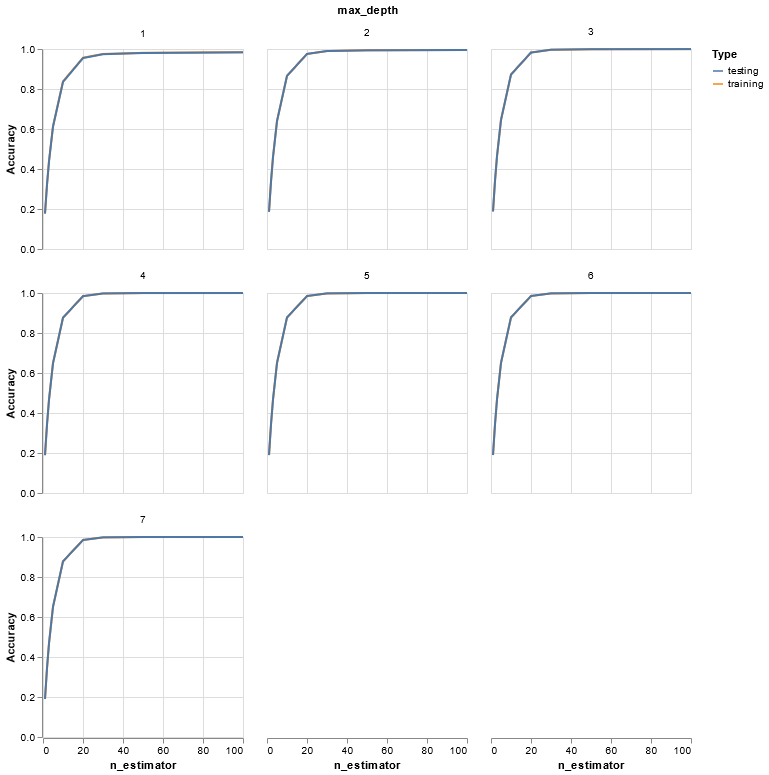

In [50]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df)
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        gbr = GradientBoostingRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(gbr.score(X_train, y_train))
        test_acc.append(gbr.score(X_test, y_test))
        print(j,i)
df_gbr = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_gbr = df_gbr.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_gbr
alt.Chart(df_gbr).mark_line().encode(
    alt.X('n_estimator'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0, 1])),
    alt.Color('Type'),
    alt.Facet('max_depth')
    ).properties(width = 200, height = 200, columns = 3)

## Write results to file

In [51]:
df_results.to_csv('../output/scenario1/results_table.csv')